Online Shopping Inentions Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('shoppers.csv')


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.Revenue = df.Revenue.astype(int)

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [ ]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

**checking for null values**

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

*we dont have any null values in our dataset*

<ipython-input-7-e1d8b82b8725>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


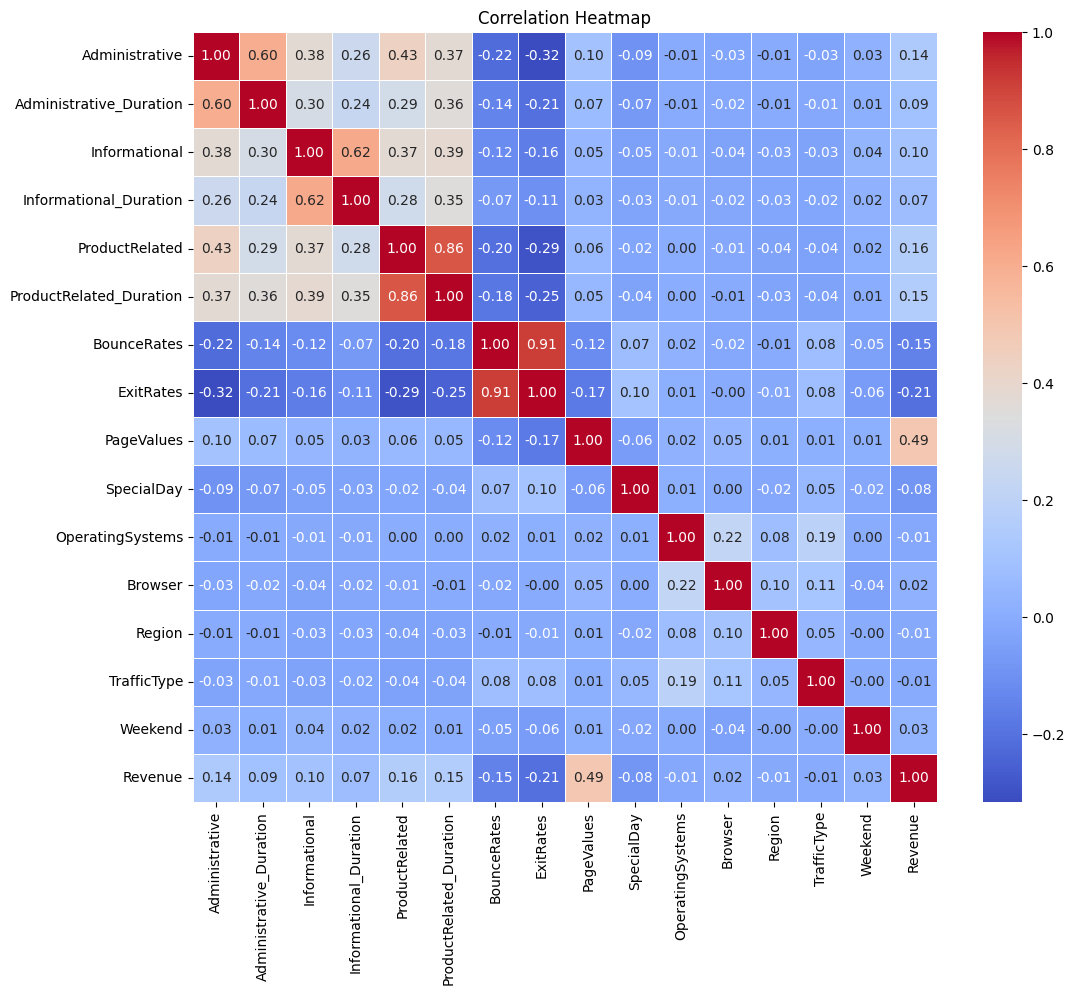

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

*we can see that columns (ProductRelated and ProuductRelated_Duration) and ( ExitRates and BounceRates) have high correlation greater than 85% so we are dropping one column in each pair*

In [ ]:
columns_to_drop = ['Browser', 'OperatingSystems', 'ExitRates', 'ProductRelated']

df.drop(columns=columns_to_drop, inplace=True)


*we are dropping Browser and OperatingSystems as they add no significant value to our prediction or analysis*

In [ ]:

  df['Month'] = df['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                                       'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
  df['VisitorType'] = df['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2})
  df['Weekend'] = df['Weekend'].astype(int)

*We are encoding categorical columns[Month,VisitorType,Weekend] to numerical colums*

**Checking for Outliers**

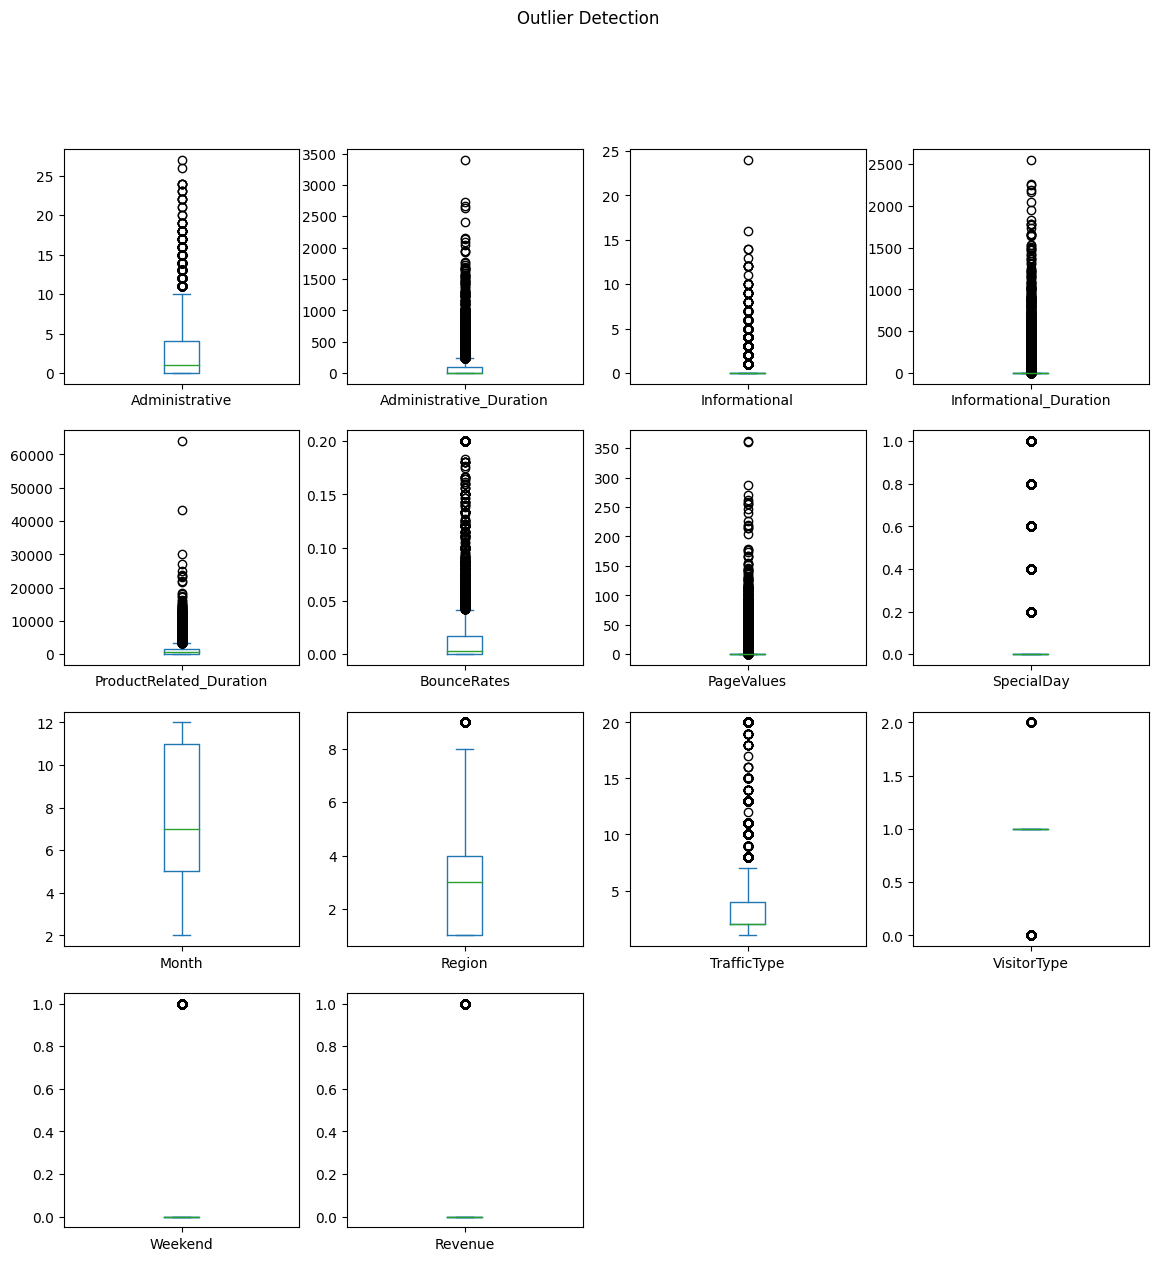

In [ ]:

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,14),
                                title='Outlier Detection')
plt.show()

*We can see that there is no significant outliers in dataset*

In [ ]:
from sklearn.model_selection import train_test_split

def read_data():

  df.fillna(0, inplace=True)

  X = df.drop('Revenue', axis=1)
  y = df['Revenue'].astype(int)


  X = (df.drop('Revenue', axis=1) - df.drop('Revenue', axis=1).min()) / (df.drop('Revenue', axis=1).max() - df.drop('Revenue', axis=1).min())

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test


In [ ]:
df.count()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated_Duration    12330
BounceRates                12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

***Logistic Regression***

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

class LogisticRegression:
    def __init__(self, X_train, X_test, y_train, y_test, max_iteration, epsilon, learningRate):
        self.learningRate = learningRate
        self.epsilon = epsilon
        self.max_iteration = max_iteration
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.w = np.zeros(13)


    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        cost = -(y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()
        cost = cost / X.shape[0]
        return cost


    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad

    def gradientDescent(self, X, y):
        errors = []
        last_error = float('inf')

        for i in tqdm(range(self.max_iteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            errors.append(current_error)
            diff = last_error - current_error
            if np.abs(diff) < self.epsilon:
                print('Model stopped learning')
                break

        return

    def predict(self, X):
      sig = self.sigmoid(X.dot(self.w))
      y_hat = np.around(sig)
      y_hat[np.isnan(y_hat)] = 0
      return y_hat


    def fit(self):
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        y_hat_train = self.predict(self.X_train)
        recall, precision, f1_score,accuracy = self.efficacy_report(y_hat_train, self.y_train)
        print('RECALL {}'.format(recall))
        print('PRECISION {}'.format(precision))
        print('F1 SCORE {}'.format(f1_score))
        print('ACCURACY {}'.format(accuracy))


    def efficacy_report(self, y_hat, y):
        y_hat = y_hat == 1
        y = y == 1
        tp = (y_hat & y).sum()
        fn = y.sum() - y_hat.sum()
        tn = (~y_hat & ~y).sum()
        recall = tp / (tp + fn)
        precision = tp / y_hat.sum()
        f1_score = 2 * precision * recall / (precision + recall)
        accuracy = (tp + tn) / len(y)
        return recall, precision, f1_score,accuracy

    def plot_confusion_matrix(self, X, y):
        cm = confusion_matrix(y, self.predict(X))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.w))
    def plot_roc_curve(self, X, y):
        # Calculate probability scores
        prob_scores = self.predict_proba(X)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y, prob_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()


In [ ]:
df.Month.value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = read_data()


In [ ]:
X_train.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
1785,0.000000,0.000000,0.000000,0.000000,0.001485,0.071429,0.000000,0.0,0.1,0.000,0.000000,0.5,0.0
10407,0.074074,0.004119,0.000000,0.000000,0.022539,0.012346,0.007656,0.0,0.9,0.250,0.052632,0.5,0.0
286,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.1,0.000,0.000000,0.5,0.0
6520,0.185185,0.014476,0.166667,0.148664,0.001166,0.000000,0.023017,0.0,0.7,0.875,0.052632,0.0,0.0
12251,0.000000,0.000000,0.041667,0.001961,0.004361,0.200000,0.000000,0.0,0.9,0.750,0.368421,0.0,1.0


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (9864, 13)
X_test shape: (2466, 13)


100%|██████████| 10000/10000 [01:14<00:00, 133.73it/s]


RECALL 0.39301634472511143
PRECISION 0.7779411764705882
F1 SCORE 0.5222112537018756
ACCURACY 0.8865571776155717


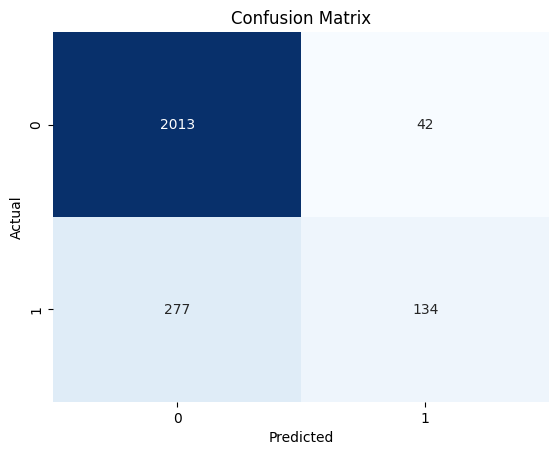

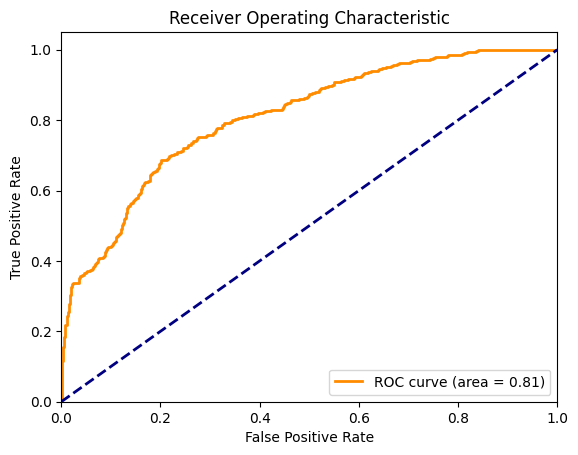

In [ ]:
lr = LogisticRegression(X_train, X_test, y_train, y_test, learningRate=0.0001, epsilon=0.0005, max_iteration=10000)
lr.fit()

lr.plot_confusion_matrix(X_test, y_test)
lr.plot_roc_curve(X_test, y_test)


***Naive Bayes***

In [ ]:
import csv
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.summaries = None
        self.target_index = None

    def convert_to_proper_type(self, value):
        try:
            return int(value)
        except ValueError:
            try:
                return float(value)
            except ValueError:
                return value

    def load_data(self, file_path):
        data = []
        with open(file_path, 'r') as file:
            reader = csv.reader(file)
            next(reader, None)
            for row in reader:
                row = [self.convert_to_proper_type(element.strip("'")) for element in row]

                # Convert 'Month' and 'VisitorType' columns to numerical values
                row[10] = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                           'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}[row[10]]
                row[15] = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}[row[15]]
                # Convert 'Weekend' column to integer
                row[16] = {'TRUE': 1, 'FALSE': 0}[row[16]]
                # Convert 'Revenue' column to boolean
                row[17] = {'TRUE': 1, 'FALSE': 0}[row[17]]

                indices_to_drop = [11, 12, 5, 7]
                for index in sorted(indices_to_drop, reverse=True):
                    del row[index]

                data.append(row)
        return data

    def split_data(self, data, test_ratio=0.3):
        test_size = int(len(data) * test_ratio)
        test_data = random.sample(data, test_size)
        train_data = [row for row in data if row not in test_data]
        return train_data, test_data

    def separate_by_class(self, data):
        separated = {}
        for row in data:
            label = row[self.target_index]
            if label not in separated:
                separated[label] = []
            separated[label].append(row)
        return separated

    def laplace_smoothing(self, value_counts, total_count, num_classes, alpha=1):
        return (value_counts + alpha) / (total_count + alpha * num_classes)

    def summarize(self, data):
        summaries = [(self.mean(column), self.stdev(column)) for column in zip(*data)]
        del summaries[-1]
        return summaries

    def mean(self, numbers):
        return sum(numbers) / float(len(numbers))

    def stdev(self, numbers):
        avg = self.mean(numbers)
        variance = sum((x - avg) ** 2 for x in numbers) / float(len(numbers) - 1)
        return math.sqrt(variance)

    def summarize_by_class(self, data):
        separated = self.separate_by_class(data)
        summaries = {}
        for class_value, instances in separated.items():
            summaries[class_value] = self.summarize(instances)
        return summaries

    def calculate_class_probabilities(self, input_vector):
        probabilities = {}
        for class_value, class_summaries in self.summaries.items():
            probabilities[class_value] = 1
            for i in range(len(class_summaries)):
                mean, stdev = class_summaries[i]
                x = input_vector[i]
                probabilities[class_value] *= self.calculate_probability(x, mean, stdev)
        return probabilities

    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def predict(self, input_vector):
        probabilities = self.calculate_class_probabilities(input_vector)
        best_label, best_prob = None, -1
        for class_value, probability in probabilities.items():
            if best_label is None or probability > best_prob:
                best_prob = probability
                best_label = class_value
        return best_label

    def accuracy(self, actual, predicted):
        correct = sum(1 for a, p in zip(actual, predicted) if a == p)
        total = len(actual)
        return correct / total

    def precision(self, actual, predicted, positive_label=1):
        true_positives = sum(1 for a, p in zip(actual, predicted) if a == positive_label and p == positive_label)
        false_positives = sum(1 for a, p in zip(actual, predicted) if a != positive_label and p == positive_label)

        if true_positives + false_positives == 0:
            return 0
        return true_positives / (true_positives + false_positives)

    def recall(self, actual, predicted, positive_label=1):
        true_positives = sum(1 for a, p in zip(actual, predicted) if a == positive_label and p == positive_label)
        false_negatives = sum(1 for a, p in zip(actual, predicted) if a == positive_label and p != positive_label)

        if true_positives + false_negatives == 0:
            return 0
        return true_positives / (true_positives + false_negatives)

    def plot_confusion_matrix(self, actual, predicted, classes, normalize=False, title='Confusion Matrix',
                              cmap=plt.cm.Blues):
        cm = confusion_matrix(actual, predicted)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap=cmap, xticklabels=classes,
                    yticklabels=classes)
        plt.title(title)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def fit(self, train_data):
        self.target_index = 13
        self.summaries = self.summarize_by_class(train_data)

    def predict_batch(self, test_data):
        predictions = [self.predict(row) for row in test_data]
        return predictions
    def calculate_class_probabilities(self, input_vector):
        probabilities = {}
        total_prob = 0
        for class_value, class_summaries in self.summaries.items():
            probabilities[class_value] = 1
            for i in range(len(class_summaries)):
                mean, stdev = class_summaries[i]
                x = input_vector[i]
                probabilities[class_value] *= self.calculate_probability(x, mean, stdev)
            total_prob += probabilities[class_value]


        for class_value in probabilities:
            probabilities[class_value] /= total_prob
        return probabilities
    def predict_probabilities(self, input_vector):
        probabilities = self.calculate_class_probabilities(input_vector)

        return probabilities.get(1, 0)

In [ ]:
classifier = NaiveBayesClassifier()
data = classifier.load_data('shoppers.csv')
train_data, test_data = classifier.split_data(data)
classifier.fit(train_data)
predictions = classifier.predict_batch(test_data)

In [ ]:
predictions_batch = classifier.predict_batch(test_data)
print("Predictions for the test data:", predictions_batch)

Predictions for the test data: [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [ ]:
actual_labels = [row[classifier.target_index] for row in test_data]
accuracy_value = classifier.accuracy(actual_labels, predictions_batch)
print("Accuracy:", accuracy_value)

Accuracy: 0.7685861043525277


In [ ]:
recall_value = classifier.recall(actual_labels, predictions_batch, positive_label=1)
print("Recall:", recall_value)

Recall: 0.7539823008849558


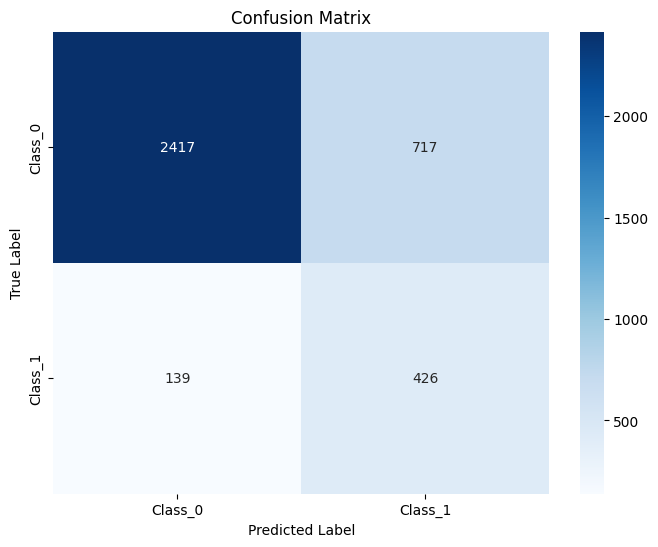

In [ ]:
classes = ["Class_0", "Class_1"]
classifier.plot_confusion_matrix(actual_labels, predictions_batch, classes)

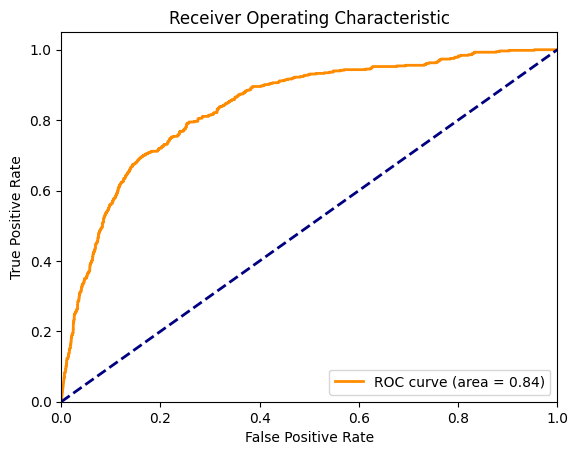

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


prob_scores = [classifier.predict_probabilities(row) for row in test_data]
actual_labels = [row[classifier.target_index] for row in test_data]
fpr, tpr, thresholds = roc_curve(actual_labels, prob_scores)


auc = roc_auc_score(actual_labels, prob_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


***Soft Margin SVM***

In [ ]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
from scipy.optimize import Bounds
from dataclasses import dataclass
from sklearn.metrics import roc_curve, auc


@dataclass
class SoftMarginSVM:
    C: float

    def dualSVM(self, gramXy, alphas):
        return alphas.sum() - 0.5 * alphas.dot(alphas.dot(gramXy))

    def jacobian_dualSVM(self, gramXy, alphas):
        return np.ones(len(alphas)) - alphas.dot(gramXy)

    def fit(self, X, y):
        N, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        y_ = y_.reshape(-1)
        Xy = X * y_[:, np.newaxis]
        gramXy = Xy.dot(Xy.T)

        alphas = np.ones(N)

        bounds = Bounds(np.zeros(N), np.full(N, self.C))
        constraints = [{'type': 'eq', 'fun': lambda a: -np.dot(a, y_),
                        'jac': lambda a: -y_}]

        slsqp = minimize(fun=lambda a: -self.dualSVM(gramXy, a),
                         x0=alphas,
                         jac=lambda a: -self.jacobian_dualSVM(gramXy, a),
                         bounds=bounds,
                         constraints=constraints,
                         method='SLSQP'
                         )
        self.alphas = slsqp.x
        self.w = np.sum((self.alphas[:, np.newaxis] * Xy), axis=0)
        epsilon = 1e-6

        self.support_vectors = X[self.alphas > epsilon]
        signdist = np.matmul(self.support_vectors, self.w)
        mindist = np.argmin(signdist)
        support_labels = y_[self.alphas > epsilon]

        self.intercept = support_labels[mindist] - signdist[mindist]

        return slsqp

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.intercept)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        actual = np.where(y <= 0, -1, 1)
        return np.mean(predictions == actual)
    def plot_roc_curve(self, X, y):

        # Convert labels to -1 or 1
        actual = np.where(y <= 0, -1, 1)

        decision_values = np.dot(X, self.w) + self.intercept

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(actual, decision_values)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#dataset_path = '/content/online_shoppers_intention 2.csv'
data = pd.read_csv('shoppers.csv')


# Filter 500 rows where Revenue is true
true_rows = data[data['Revenue'] == True].head(500)

# Filter 500 rows where Revenue is false
false_rows = data[data['Revenue'] == False].head(500)

selected_data = pd.concat([true_rows, false_rows], ignore_index=True)

label_encoder = preprocessing.LabelEncoder()
selected_data['Weekend'] = label_encoder.fit_transform(selected_data['Weekend'])
selected_data['Month'] = label_encoder.fit_transform(selected_data['Month'])
selected_data['VisitorType'] = label_encoder.fit_transform(selected_data['VisitorType'])
selected_data['Revenue'] = label_encoder.fit_transform(selected_data['Revenue'])

X_selected = selected_data[['Month', 'VisitorType', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Region', 'TrafficType', 'Weekend']]
y_selected = selected_data['Revenue']

scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected_scaled, y_selected, test_size=0.25, random_state=42)


svm_model_selected.fit(X_train_selected, np.abs(y_train_selected.values))
accuracy_selected = svm_model_selected.accuracy(X_test_selected, y_test_selected.values)
print(f"Accuracy on the selected test set: {accuracy_selected}")

Accuracy on the selected test set: 0.956


Confusion Matrix:
[[122   6]
 [  5 117]]
Precision: 0.9512195121951219
Recall: 0.9590163934426229
F1 Score: 0.9551020408163264


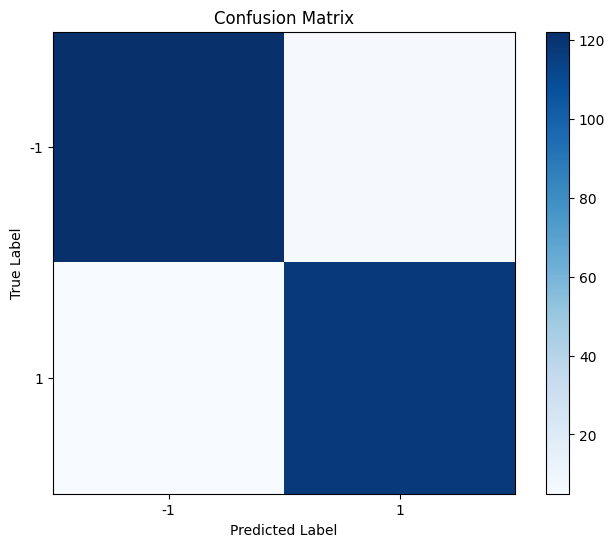

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
predictions_selected = svm_model_selected.predict(X_test_selected)

actual_selected = np.where(y_test_selected <= 0, -1, 1)

# Confusion Matrix
cm = confusion_matrix(actual_selected, predictions_selected)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1 Score
precision = precision_score(actual_selected, predictions_selected)
recall = recall_score(actual_selected, predictions_selected)
f1 = f1_score(actual_selected, predictions_selected)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [-1, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()